In [1]:
install.packages('Seurat')
library(dplyr)
library(Seurat)
library(patchwork)



  There is a binary version available but the source version is later:
       binary source needs_compilation
Seurat  4.0.2  4.0.5              TRUE

  Binaries will be installed
package 'Seurat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marwa\AppData\Local\Temp\Rtmp6xA6WE\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching SeuratObject



# Loading the Data

In [2]:
# Load the dataset
scnormal.data <- Read10X(data.dir = "/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/GSE163974_RAW/normal")
sctumor.data <- Read10X(data.dir = "/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/GSE163974_RAW/tumor")

In [4]:
# Initialize the Seurat object with the raw (non-normalized data).
objectN  <- CreateSeuratObject(counts = scnormal.data, project = "SingleCellNormal", min.cells = 0, min.features = 0) #Seurat tutorial recommended parameters: min.cells = 3, min.features = 200 
objectT  <- CreateSeuratObject(counts = sctumor.data, project = "SingleCellTumor", min.cells = 0, min.features = 0)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [6]:
objectN

An object of class Seurat 
33694 features across 1456 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)

In [7]:
objectN@assays$RNA@counts

   [[ suppressing 32 column names 'AAACATTGGCTCCT-1', 'AAACCGTGATCGAC-1', 'AAACGCACCAGAAA-1' ... ]]

   [[ suppressing 32 column names 'AAACATTGGCTCCT-1', 'AAACCGTGATCGAC-1', 'AAACGCACCAGAAA-1' ... ]]

   [[ suppressing 32 column names 'AAACATTGGCTCCT-1', 'AAACCGTGATCGAC-1', 'AAACGCACCAGAAA-1' ... ]]



33694 x 1456 sparse Matrix of class "dgCMatrix"
                                                                                             
RP11-34P13.3     . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
FAM138A          . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
OR4F5            . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
RP11-34P13.7     . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
RP11-34P13.8     . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
RP11-34P13.14    . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
RP11-34P13.9     . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
FO538757.3       . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
FO538757.2       . . . . . .  . . . . .  . . . .  . . . . . .  .  . . . . . . . .  . . ......
AP006222.2  

In [8]:
head(objectN@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACATTGGCTCCT-1,SingleCellNormal,740,388
AAACCGTGATCGAC-1,SingleCellNormal,593,362
AAACGCACCAGAAA-1,SingleCellNormal,514,249
AAACGGCTAAAGTG-1,SingleCellNormal,809,394
AAACGGCTGTATGC-1,SingleCellNormal,671,396
AAAGACGAGACACT-1,SingleCellNormal,1318,630


# Quality Control

## 1. QC using Seurat

### Proportion of Transcripts mapping to mitochondrial, ribosomal and Hb genes

In [7]:
# Calculate the proportion of transcripts mapping to mitochondrial genes
objectN[["percent_mt"]] <- PercentageFeatureSet(objectN, pattern = "^MT-") 
objectT[["percent_mt"]] <- PercentageFeatureSet(objectT, pattern = "^MT-") 

In [8]:
# Calculate the proportion of transcripts mapping to ribosomal RNA
objectN[["percent_ribo"]] <- PercentageFeatureSet(objectN, pattern = "^RP[SL]") 
objectT[["percent_ribo"]] <- PercentageFeatureSet(objectT, pattern = "^RP[SL]")

In [9]:
# Calculate proportion hemoglobin genes, which can give an indication of red blood cell contamination (includes all genes starting with HB except HBP)
objectN[["percent_hb"]] <- PercentageFeatureSet(objectN, pattern = "^HB[^(P)]")
objectN[["percent_plat"]] <- PercentageFeatureSet(objectN, pattern = "PECAM1|PF4")

objectT[["percent_hb"]] <- PercentageFeatureSet(objectT, pattern = "^HB[^(P)]")
objectT[["percent_plat"]] <- PercentageFeatureSet(objectT, pattern = "PECAM1|PF4")

In [10]:
# Optional: Add number of genes per UMI for each cell to metadata
objectN[["log10GenesPerUMI"]] <- log10(objectN$nFeature_RNA) / log10(objectN$nCount_RNA)
objectT[["log10GenesPerUMI"]] <- log10(objectT$nFeature_RNA) / log10(objectT$nCount_RNA)

In [11]:
head(objectN@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACATTGGCTCCT-1,SingleCellNormal,740,388,23.513514,5.675676,0,0,0.9022735
AAACCGTGATCGAC-1,SingleCellNormal,593,362,2.192243,23.946037,0,0,0.9227040
AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.000000,43.190661,0,0,0.8838923
AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.977750,33.992583,0,0,0.8925523
AAACGGCTGTATGC-1,SingleCellNormal,671,396,4.918033,21.162444,0,0,0.9189778
AAAGACGAGACACT-1,SingleCellNormal,1318,630,1.365706,25.341426,0,0,0.8972489


### Plotting QC features

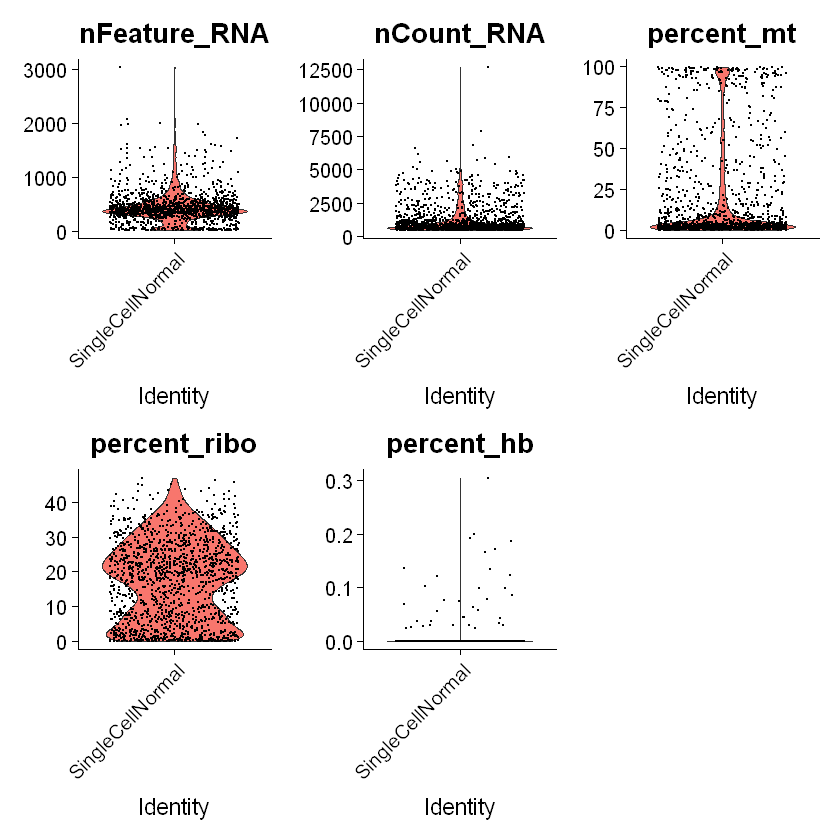

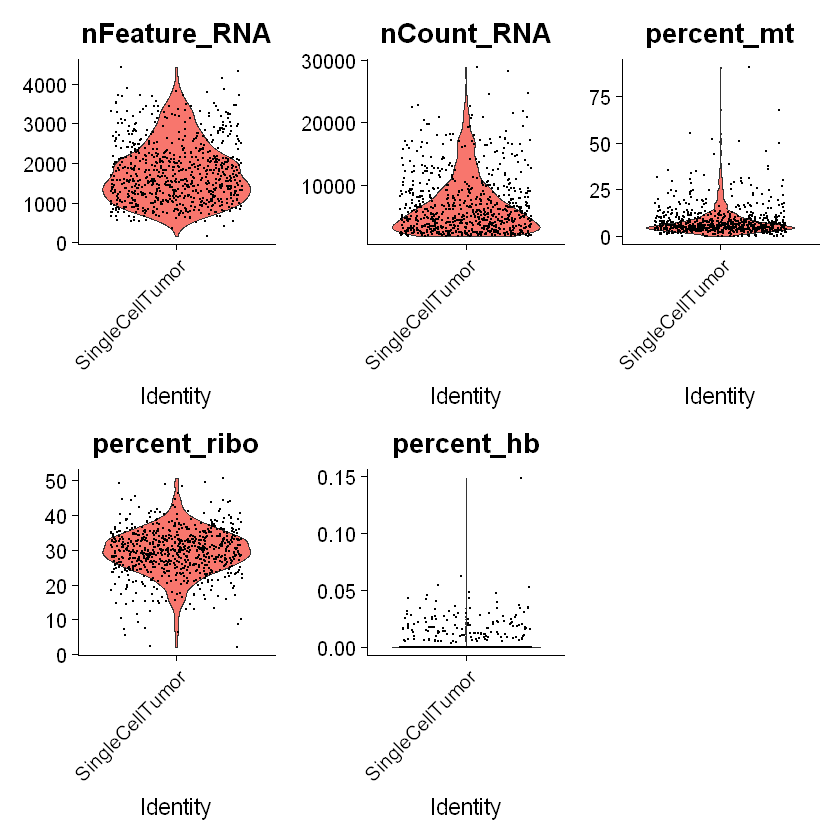

In [12]:
# Plot some of the QC-features as violin plots
feats <- c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_ribo", "percent_hb")
VlnPlot(objectN, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 3) + NoLegend()
VlnPlot(objectT, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 3) + NoLegend()


some difference in quality for the 2 datasets, with for instance the normal sample having fewer cells with many detected genes and more mitochondrial content. 
As the ribosomal proteins are highly expressed they will make up a larger proportion of the transcriptional landscape when fewer of the lowly expressed genes are detected. And we can plot the different QC-measures as scatter plots.

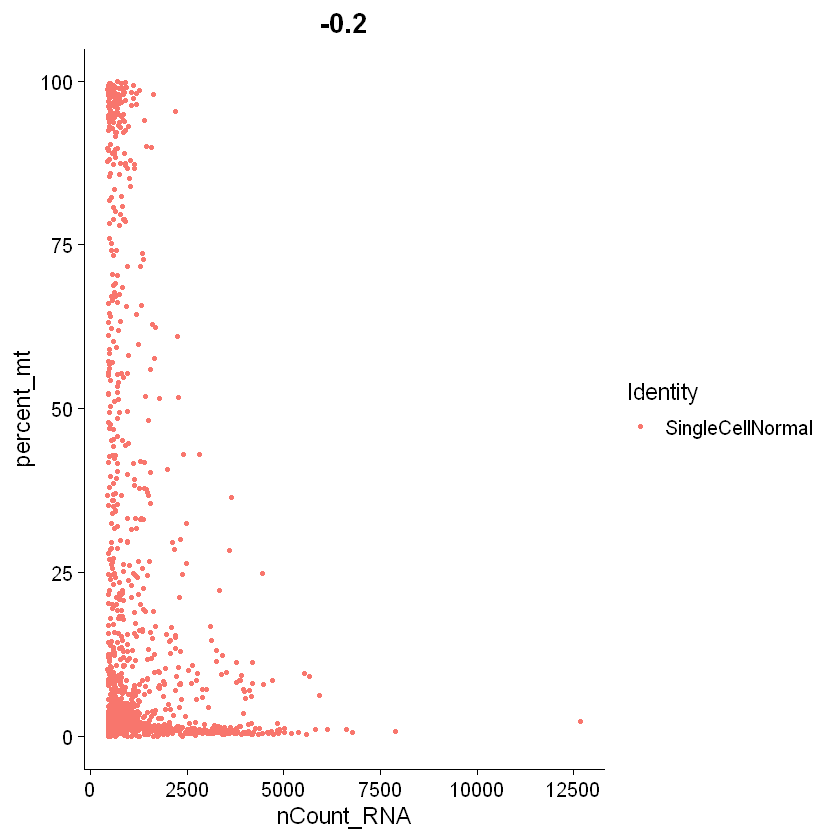

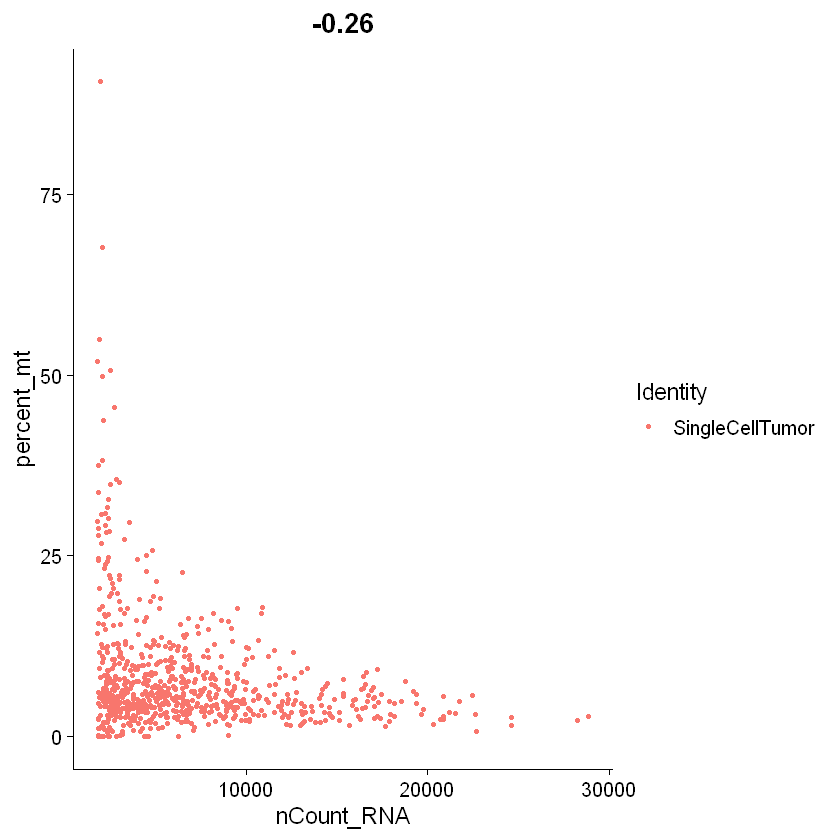

In [23]:
# Visualize number of transcripts per cell vs % mitochondrial RNA
# Cells with a high % of mitochondrial RNA are often dying cells, from which the RNA is leaking. 
# Mitochondrial RNA, however, is contained inside the mitochondria and doesn't leak from the cell.
# Therefore, cells with very high % mt RNA will have a low total RNA count 
plot1 <- FeatureScatter(objectN, feature1 = "nCount_RNA", feature2 = "percent_mt")
plot2 <- FeatureScatter(objectT, feature1 = "nCount_RNA", feature2 = "percent_mt")
plot1 
plot2

These plots show again, that the normal cell dataset contains many dying cells with high %mtRNA and low total RNA count

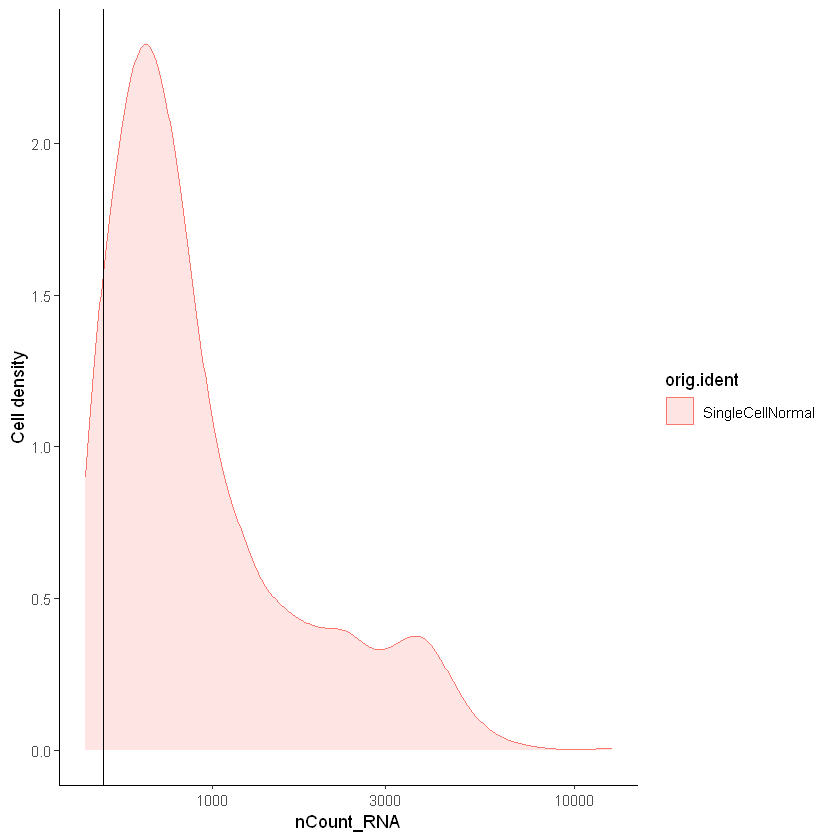

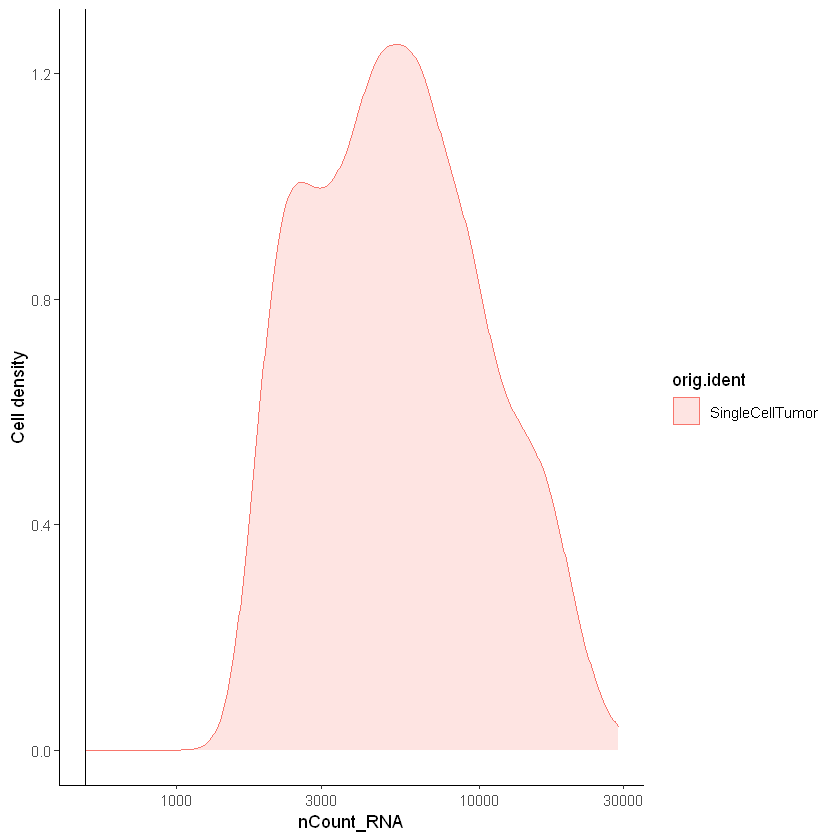

In [20]:
#The UMI counts per cell should generally be above 500, that is the low end of what we expect. 
#If UMI counts are between 500-1000 counts, it is usable but the cells probably should have been sequenced more deeply.

# Visualize the number UMIs/transcripts per cell
library(ggplot2)
objectN@meta.data %>% 
  ggplot(aes(color=orig.ident, x=nCount_RNA , fill= orig.ident)) + geom_density(alpha = 0.2) + scale_x_log10() + theme_classic() +
  ylab("Cell density") + geom_vline(xintercept = 500)

library(ggplot2)
objectT@meta.data %>% 
  ggplot(aes( color=orig.ident, x=nCount_RNA , fill= orig.ident)) + geom_density(alpha = 0.2) + scale_x_log10() + theme_classic() +
  ylab("Cell density") + geom_vline(xintercept = 500)

Most cells in the normal cell dataset have less than 1000 UMIs, which means the cells might have not been sequenced deeply enough.

That majority the tumor cells have 1000 UMIs or greater, which is great.

### Computing and Visualizing genes with highest expression levels *Segment needs work*

In [25]:
# Compute the relative expression of each gene per cell Use sparse matrix operations, 
# if your dataset is large, doing matrix devisions the regular way will take a very long time.
par(mar = c(4, 8, 2, 1))
C <- data.filtN@assays$RNA@counts
C <- Matrix::t(Matrix::t(C)/Matrix::colSums(C)) * 100
most_expressed <- order(apply(C, 1, median), decreasing = T)[20:1]
boxplot(as.matrix(t(C[most_expressed, ])), cex = 0.1, las = 1, xlab = "% total count per cell", 
    col = (scales::hue_pal())(20)[20:1], horizontal = TRUE)
#boxplot(as.matrix(t(CN[most_expressed_N, ])), cex = 0.1, las = 1, xlab = "% total count per cell", 
    #col = (scales::hue_pal())(20)[20:1], horizontal = TRUE)


ERROR: Error in t.default(C[most_expressed, ]): argument is not a matrix


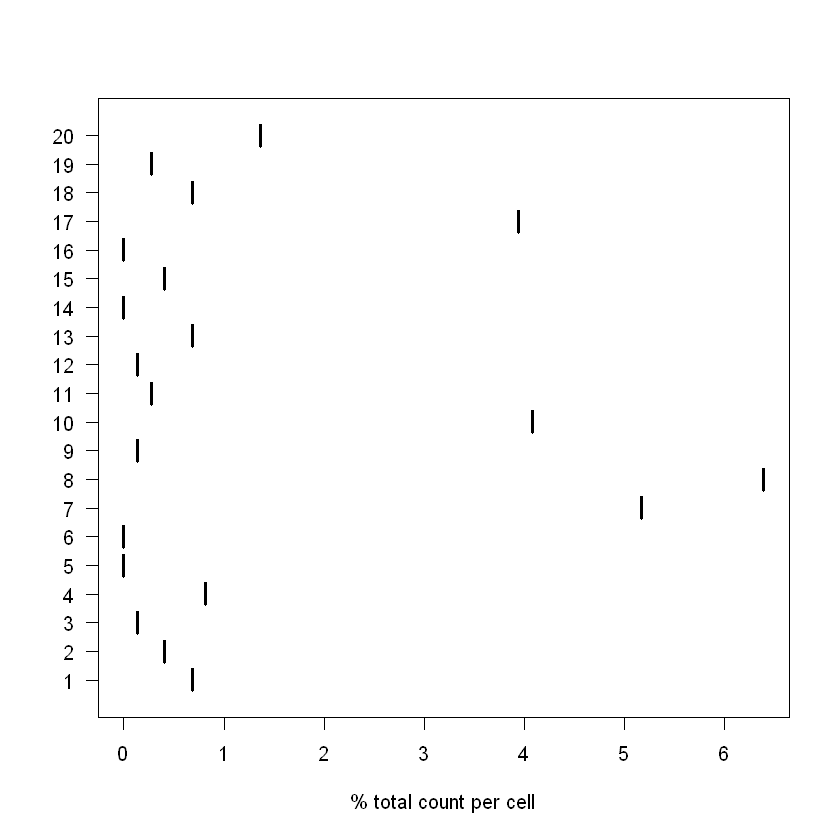

In [27]:
boxplot(as.matrix(t(C[most_expressed])), cex = 0.1, las = 1, xlab = "% total count per cell", 
    col = (scales::hue_pal())(20)[20:1], horizontal = TRUE)

### Filtering cells with very low/ high reads and genes with low counts, as well as cells with high mitochondrial (and low ribosomal) gene exprssion

- low read counts could indicate incomplete capture of the cell content
- high read counts could indicate potential doublet/multiplet (multiple cells in one droplet during scRNA seq)
- high mitochondrial gene expression could indicate cell degradation, resulting in a loss of cytoplasmic mRNAs 

Option 1: Filter out low quality cells using all thresholds together (recommended)

In [ ]:
## Filter out low quality cells using selected thresholds - these will change with experiment
#filtered_object <- subset(x = merged_seurat, 
                         subset= (nUMI >= 500) & 
                           (nGene >= 250) & 
                           (log10GenesPerUMI > 0.80) & 
                           (mitoRatio < 0.20))
                        

In [34]:
data.filtN <- subset(objectN, subset = nFeature_RNA > 200 & nFeature_RNA < 7000 & percent_mt < 5) # official Seurat method
dim(data.filtN)
data.filtT <- subset(objectT, subset = nFeature_RNA > 200 & nFeature_RNA < 25000 & percent_mt < 5) # official Seurat method
dim(data.filtT)

[1] 33694   891

[1] 33694   325

Option 2: Filter out low quality cells using each alone metric alone

In [24]:
# Filter cells with low amount of reads as well as genes that are present in at least a certain amount of cells
# => eg only consider cells with at least 200 detected genes and genes that are expressed in at least 3 cells
#The number of unique genes detected in each cell.
#Low-quality cells or empty droplets will often have very few genes
#Cell doublets or multiplets may exhibit an aberrantly high gene count

#selected_cN <- WhichCells(objectN, expression = nFeature_RNA > 200)
#selected_cT <- WhichCells(objectT, expression = nFeature_RNA > 200)
#selected_fN <- rownames(objectN)[Matrix::rowSums(objectN) > 3]
#selected_fT <- rownames(objectT)[Matrix::rowSums(objectT) > 3]

#data.filtN <- subset(objectN, features = selected_fN, cells = selected_cN)
#dim(data.filtN)
#data.filtT <- subset(objectT, features = selected_fT, cells = selected_cT)
#dim(data.filtT)

[1] 11242  1248

[1] 12916   753

In [ ]:
##mito/ ribo filtering
#selected_mito <- WhichCells(data.filt, expression = percent_mito < 0.2)
#selected_ribo <- WhichCells(data.filt, expression = percent_ribo > 0.05)

##and subset the object to only keep those cells
#data.filt <- subset(data.filt, cells = selected_mito)
#data.filt <- subset(data.filt, cells = selected_ribo)

#dim(data.filt)

#table(data.filt$orig.ident)

### Plot QC stats for filtered data for comparison

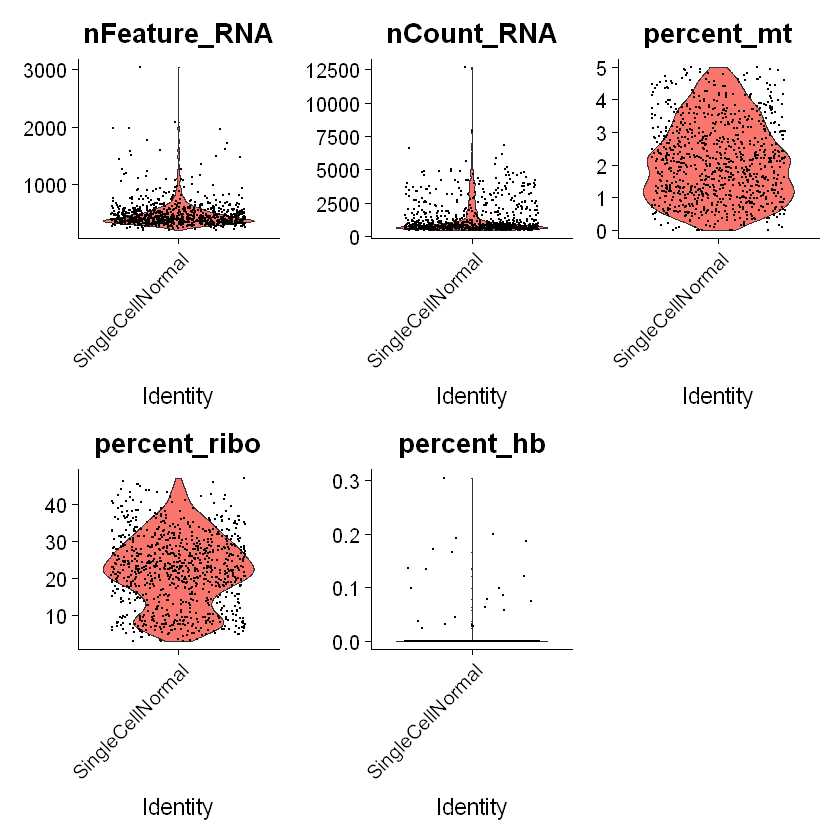

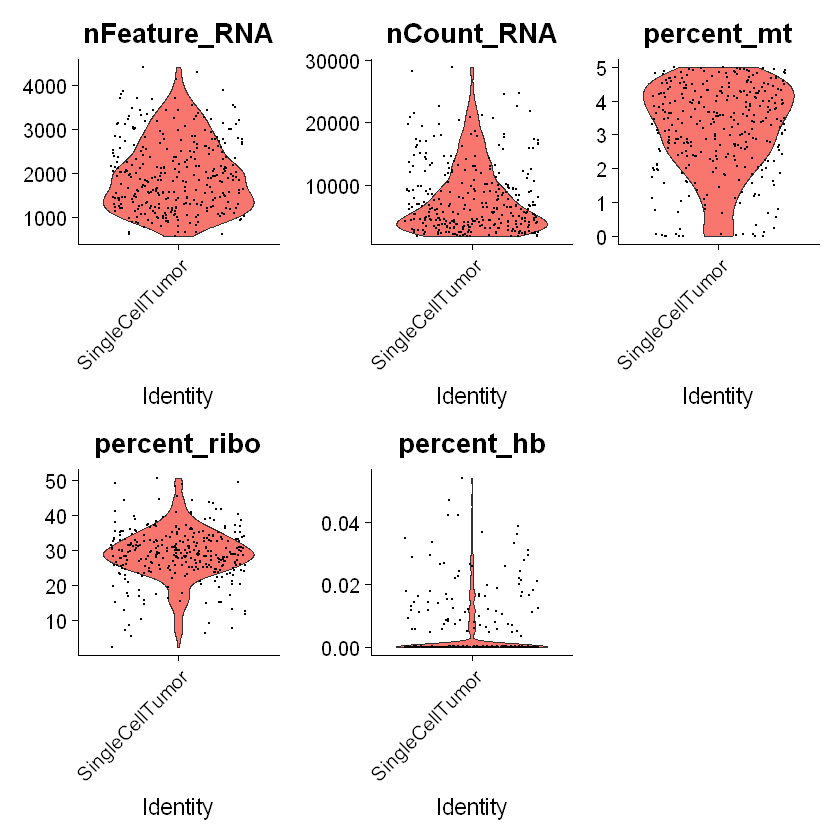

In [37]:
## plot QC stats for filtered data for comparison
feats <- c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_ribo", "percent_hb")

VlnPlot(data.filtN, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 3) + NoLegend()
VlnPlot(data.filtT, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 3) + NoLegend()

### Remove mitochondrial / ribosomal / RBCs gene expression (or overly expressed genes)


In [ ]:
## filter  mitochondrial gene expression as they are mainly technical, 
##it can be wise to remove them from the dataset bofore further analysis

#dim(data.filt)

## Filter Mitochondrial
#data.filt <- data.filt[!grepl("^MT-", rownames(data.filt)), ]

##Filter Ribossomal gene (optional if that is a problem on your data) data.filt
# <- data.filt[ ! grepl('^RP[SL]', rownames(data.filt)), ]

## Filter Hemoglobin gene (optional if that is a problem on your data)
#data.filt <- data.filt[!grepl("^HB[^(P)]", rownames(data.filt)), ]

#dim(data.filt)

## 2. QC using Scater

### Using pipecomb results:
Doublet remover: scDblFinder 

Default filter settings: exclude cells that are outliers according to at least two of the following thresholds: log10_total_counts >2.5 MADs or <5 MADs, log10_total_features >2.5 MADs or <5 MADs, pct_counts_in_top_20_features > or < 5 MADs, featcount_dist (distance to expected ratio of log10 counts and features) > or < 5 MADs, pct_counts_Mt > 2.5 MADs and > 0.08.

*NB: Removal of mitochondiral or ribosomal genes did not appear beneficial.

### Multivariate Outlier Detection

## Saving QC filtered data

In [38]:
dir.create("C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results", showWarnings = F)

saveRDS(data.filtN, "C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results/CRCN_qc.rds")
saveRDS(data.filtT, "C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results/CRCT_qc.rds")


# Normalize Data

Visualize data before normalization

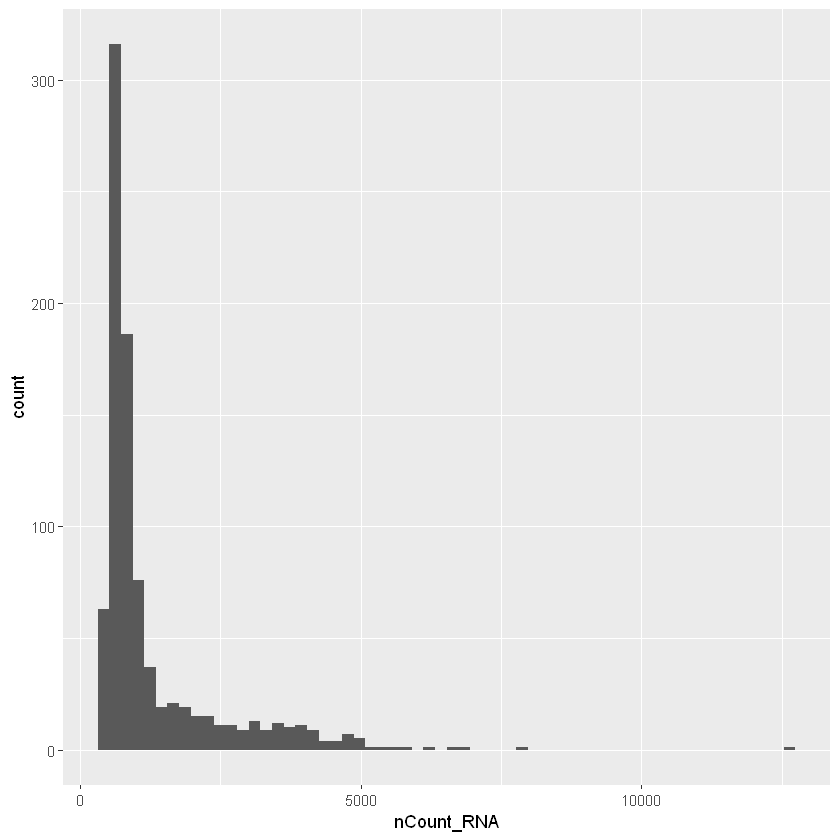

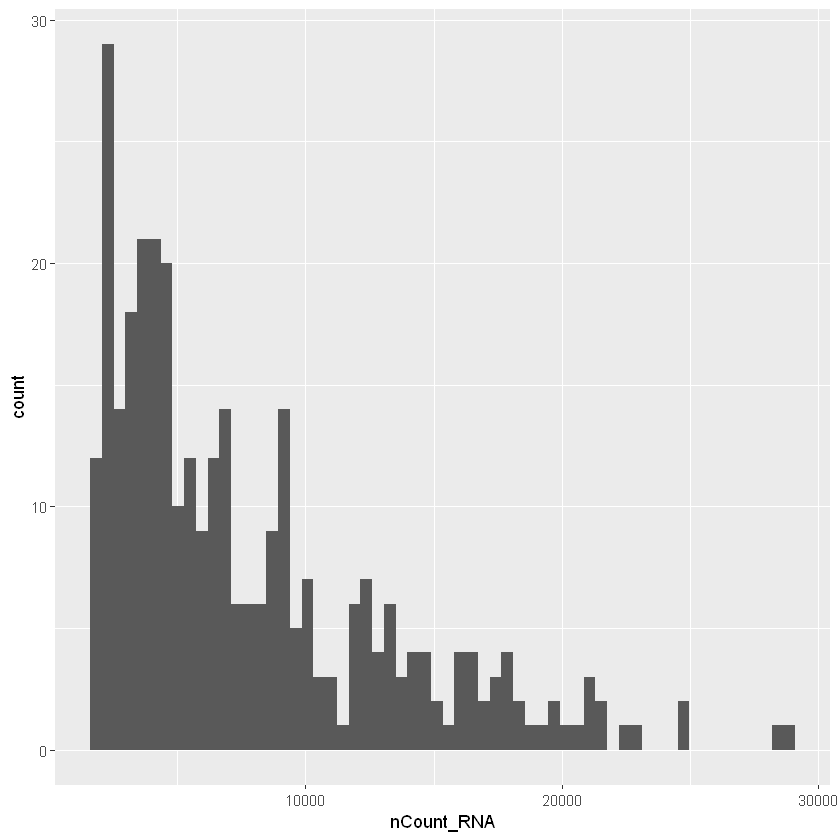

In [39]:
library(ggplot2)
ggplot(data.filtN@meta.data,aes(nCount_RNA))+ geom_histogram(bins=60)
ggplot(data.filtT@meta.data,aes(nCount_RNA))+ geom_histogram(bins=60)

Data is spread over a large range of RNA counts, showing high variabilty

Normalize data

In [40]:
#Normalize data
data.filtN <- NormalizeData(data.filtN)
data.filtT <- NormalizeData(data.filtT)

Visualize data after normalization

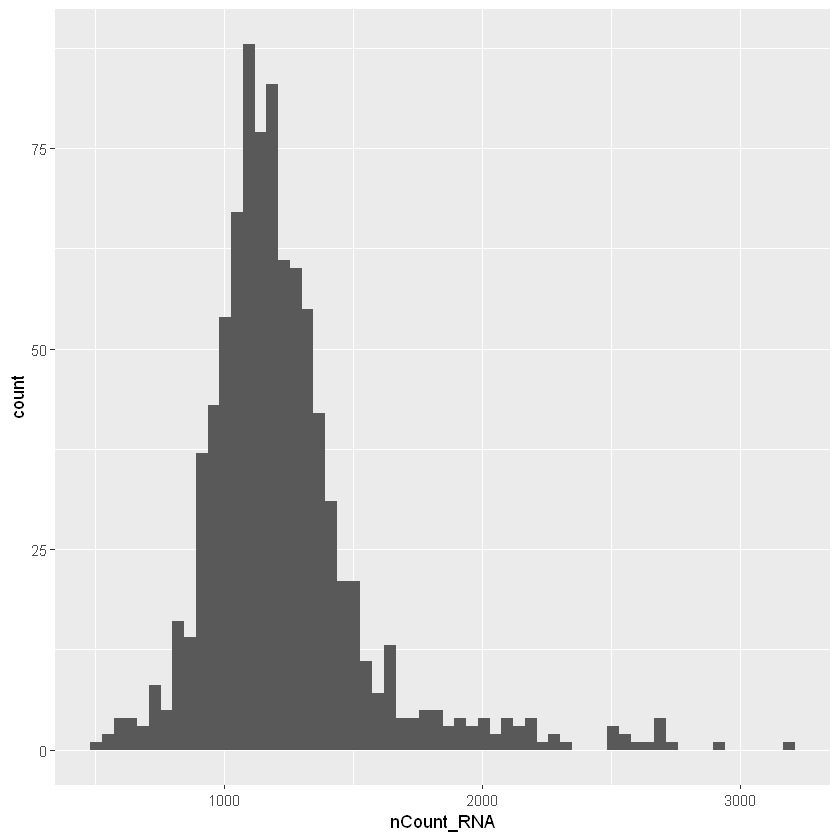

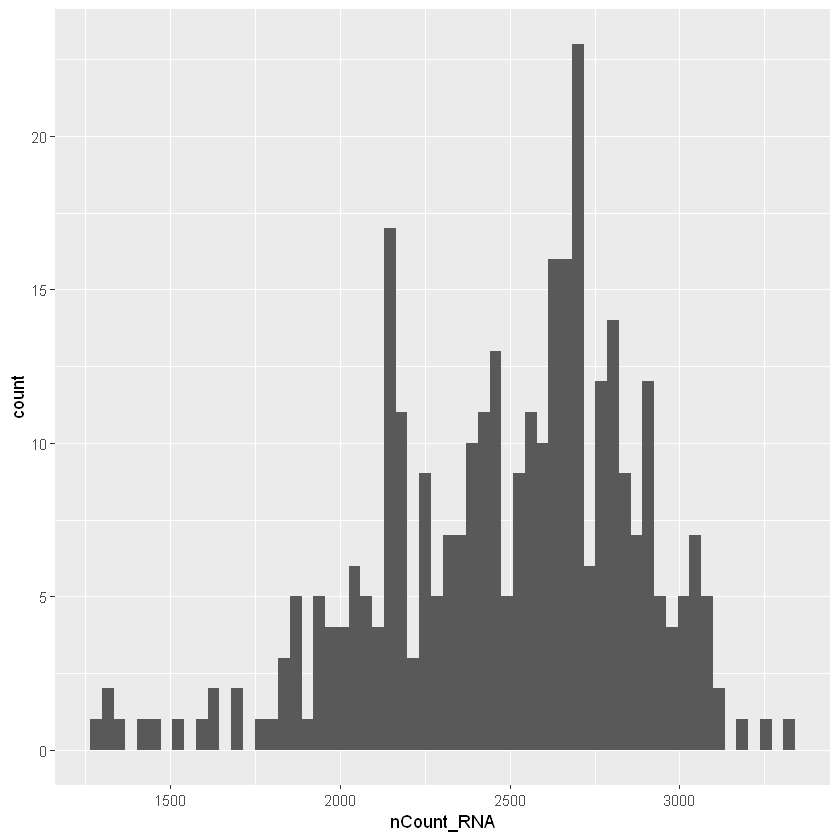

In [41]:
HistDataN = data.frame(nCount_RNA=colSums(as.matrix(data.filtN[["RNA"]]@data)))
ggplot(HistDataN, aes(nCount_RNA))+ geom_histogram(bins=60)

HistDataT = data.frame(nCount_RNA=colSums(as.matrix(data.filtT[["RNA"]]@data)))
ggplot(HistDataT, aes(nCount_RNA))+ geom_histogram(bins=60)

# Merge Normalized Seurat Objects


In [42]:
data.comb <- merge(data.filtN , y = data.filtT, add.cell.ids = c("N", "T"), project = "SingleCellCombined", 
    merge.data = TRUE)
dim(data.comb)
head(data.comb@meta.data)
tail(data.comb@meta.data)

[1] 33694  1216

,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N_AAACCGTGATCGAC-1,SingleCellNormal,593,362,2.192243,23.94604,0,0,0.9227040
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.000000,43.19066,0,0,0.8838923
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.977750,33.99258,0,0,0.8925523
N_AAACGGCTGTATGC-1,SingleCellNormal,671,396,4.918033,21.16244,0,0,0.9189778
N_AAAGACGAGACACT-1,SingleCellNormal,1318,630,1.365706,25.34143,0,0,0.8972489
N_AAAGCAGAACTAGC-1,SingleCellNormal,1524,598,1.246719,29.00262,0,0,0.8723576


,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T_TTCGAGGAATCTTC-1,SingleCellTumor,22650,3793,3.1302428,35.93819,0.008830022,0.008830022,0.8217972
T_TTGCTATGGGTAGG-1,SingleCellTumor,3669,1462,4.2245844,23.46688,0.000000000,0.000000000,0.8878959
T_TTGGGAACTGGTCA-1,SingleCellTumor,4648,1580,4.9698795,23.92427,0.000000000,0.043029260,0.8722184
T_TTTAGCTGCTGCAA-1,SingleCellTumor,3529,1192,4.1088127,29.95183,0.000000000,0.000000000,0.8671303
T_TTTCCAGAAAACAG-1,SingleCellTumor,9027,1959,0.1883239,35.59322,0.000000000,0.033233632,0.8322584
T_TTTGCATGCTGTCC-1,SingleCellTumor,9308,2484,3.6635153,25.58015,0.000000000,0.042973786,0.8554483


In [43]:
data.frame(data.comb[["RNA"]]@data )

,N_AAACCGTGATCGAC.1,N_AAACGCACCAGAAA.1,N_AAACGGCTAAAGTG.1,N_AAACGGCTGTATGC.1,N_AAAGACGAGACACT.1,N_AAAGCAGAACTAGC.1,N_AAAGCAGACTGTTT.1,N_AAAGGCCTCTACGA.1,N_AAAGTTTGGTAGCT.1,N_AAATACTGTCTTAC.1,⋯,T_TTACTCGAAAGCAA.1,T_TTAGTCACTAAGGA.1,T_TTATGAGATTGCGA.1,T_TTCAAAGAAGCAAA.1,T_TTCGAGGAATCTTC.1,T_TTGCTATGGGTAGG.1,T_TTGGGAACTGGTCA.1,T_TTTAGCTGCTGCAA.1,T_TTTCCAGAAAACAG.1,T_TTTGCATGCTGTCC.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RP11-34P13.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000
FAM138A,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000
OR4F5,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000
RP11-34P13.14,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000
RP11-34P13.9,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000
FO538757.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000
FO538757.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.000000,0.000000,0.000000,0,0.000000


# Find DEGs

In [44]:
# selcect 2000 most variable genes 
data.comb = FindVariableFeatures(data.comb, selection.method = "vst", nfeatures = 2000)

NB: FindVariableFeatures() uses a variance stabilizing transformation as default to account for technical noise (Heteroscedasticity) 
Reference: *Brennecke, P., Anders, S., Kim, J. et al. Accounting for technical noise in single-cell RNA-seq experiments. Nat Methods 10, 1093–1095 (2013). https://doi.org/10.1038/nmeth.2645*

In [45]:
length(VariableFeatures(data.comb))

[1] 2000

In [46]:
head(HVFInfo(data.comb))

,mean,variance,variance.standardized
,<dbl>,<dbl>,<dbl>
RP11-34P13.3,0.0000000000,0.0000000000,0.0000000
FAM138A,0.0000000000,0.0000000000,0.0000000
OR4F5,0.0000000000,0.0000000000,0.0000000
RP11-34P13.7,0.0008223684,0.0008223684,0.9999952
RP11-34P13.8,0.0000000000,0.0000000000,0.0000000
RP11-34P13.14,0.0000000000,0.0000000000,0.0000000


Genes with high standardized variance are selected

In [48]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(data.comb), 10)
top10

[1] "IGLC2"  "REG1A"  "IGLL5"  "OLFM4"  "IGLC3"  "IGFBP7" "C1QA"   "C1QC"  
 [9] "CFD"    "IGHA1"

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 17064 rows containing missing values (geom_point)."


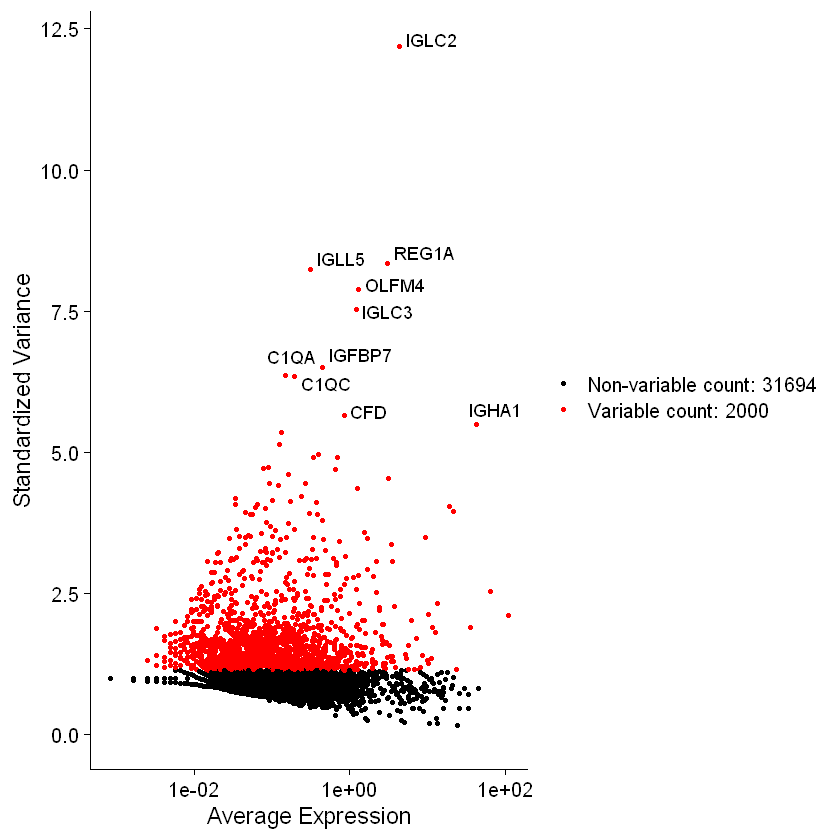

In [49]:
plot1 <- VariableFeaturePlot(data.comb)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

# Scaling the data

Shifts the expression of each gene, so that the mean expression across cells is 0
Scales the expression of each gene, so that the variance across cells is 1
This step gives equal weight in downstream analyses, so that highly-expressed genes do not dominate

In [50]:
all.genes <- rownames(data.comb)
data.comb <- ScaleData(data.comb, features = all.genes)

Centering and scaling data matrix



In [ ]:
##if scaling takes too long, we can alternatively scale only the genes that will be used as input to PCA (top 2000 DEGs). 
##To do this, omit the features argument in the previous function call, i.e.

#data.comb <- ScaleData(data.comb)

In [51]:
# The results of scaling are stored in 
head(data.comb[["RNA"]]@scale.data)

,N_AAACCGTGATCGAC-1,N_AAACGCACCAGAAA-1,N_AAACGGCTAAAGTG-1,N_AAACGGCTGTATGC-1,N_AAAGACGAGACACT-1,N_AAAGCAGAACTAGC-1,N_AAAGCAGACTGTTT-1,N_AAAGGCCTCTACGA-1,N_AAAGTTTGGTAGCT-1,N_AAATACTGTCTTAC-1,⋯,T_TTACTCGAAAGCAA-1,T_TTAGTCACTAAGGA-1,T_TTATGAGATTGCGA-1,T_TTCAAAGAAGCAAA-1,T_TTCGAGGAATCTTC-1,T_TTGCTATGGGTAGG-1,T_TTGGGAACTGGTCA-1,T_TTTAGCTGCTGCAA-1,T_TTTCCAGAAAACAG-1,T_TTTGCATGCTGTCC-1
RP11-34P13.3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
FAM138A,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
OR4F5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
RP11-34P13.7,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,⋯,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697,-0.02867697
RP11-34P13.8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
RP11-34P13.14,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


# PCA 

In [52]:
data.comb <- RunPCA(data.comb, features = VariableFeatures(object = data.comb)) 

PC_ 1 
Positive:  VIM, HLA-DPA1, CD74, SRGN, HLA-DPB1, LTB, IGKC, RGS1, CD27, AL928768.3 
	   JCHAIN, TRBC1, HLA-DRA, IGHA2, HLA-DRB1, HLA-DQB1, GZMA, MZB1, BTG2, GMFG 
	   TRGC2, HLA-DQA1, IGHA1, DERL3, HLA-DRB5, TRDC, ALOX5AP, AKR1B1, CD8A, FAM46C 
Negative:  KRT18, AGR2, EPCAM, GPX2, IFI27, CEACAM5, TFF3, S100A14, CLDN7, KRT8 
	   RAC1, KRT19, CLDN4, LGALS4, CLDN3, S100A6, LGALS3, ANXA2, NQO1, FXYD3 
	   FAM3D, CD9, TSPAN1, S100A16, SOD3, TSPAN8, TXN, KRTCAP3, PHLDA2, PIGR 
PC_ 2 
Positive:  CKS2, CYCS, RPL22L1, H2AFZ, PTTG1, CDX1, CCNB1, HMGB2, CDCA3, HSPD1 
	   TK1, CD24, LGALS4, KRT18, BIRC5, UBE2C, GPX2, OCIAD2, TESC, NME1 
	   AGR2, EPCAM, RPS21, CENPW, TAF9, CCNB2, S100A14, RRM2, AURKB, SNRPF 
Negative:  C1R, COL1A2, MFAP4, DCN, LUM, IGFBP7, SERPING1, FBLN1, C1S, PMP22 
	   CFD, COL3A1, SPARC, CTSK, SERPINF1, PCOLCE, MGP, ADH1B, EFEMP2, IGFBP6 
	   PLAC9, TCF21, SFRP2, MFGE8, DPT, CXCL12, OLFML3, COL1A1, IGFBP5, COL6A1 
PC_ 3 
Positive:  CCNB1, CENPW, PTTG1, CDKN3, HULC, CDCA3

### Examine and visualize PCA results

#### VizDimReduction()

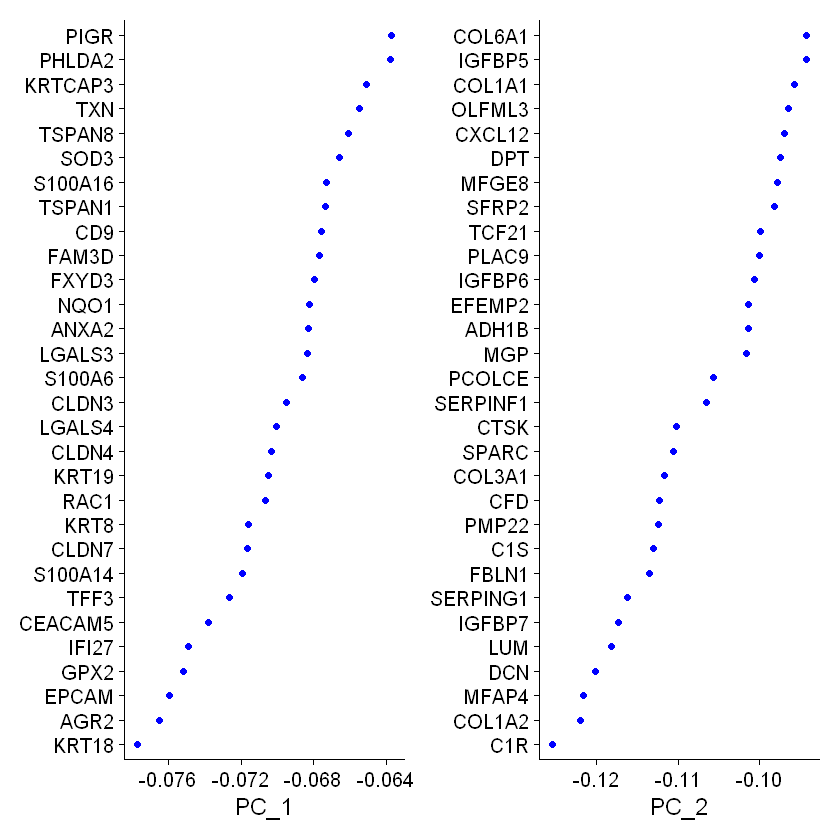

In [53]:
VizDimLoadings(data.comb, dims = 1:2, reduction = "pca")

#### DimPlot

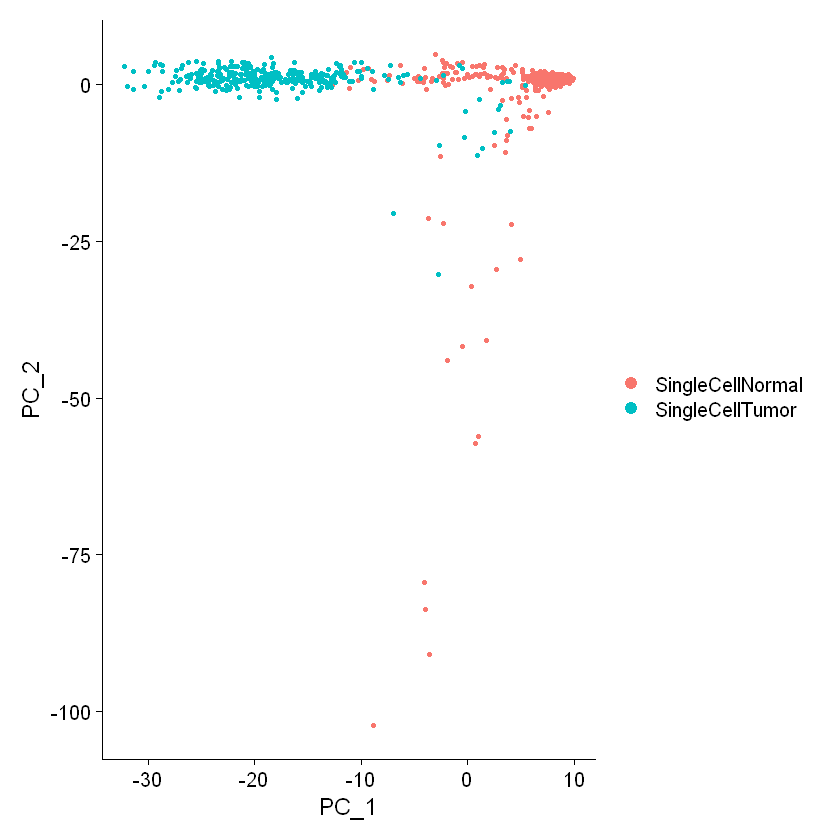

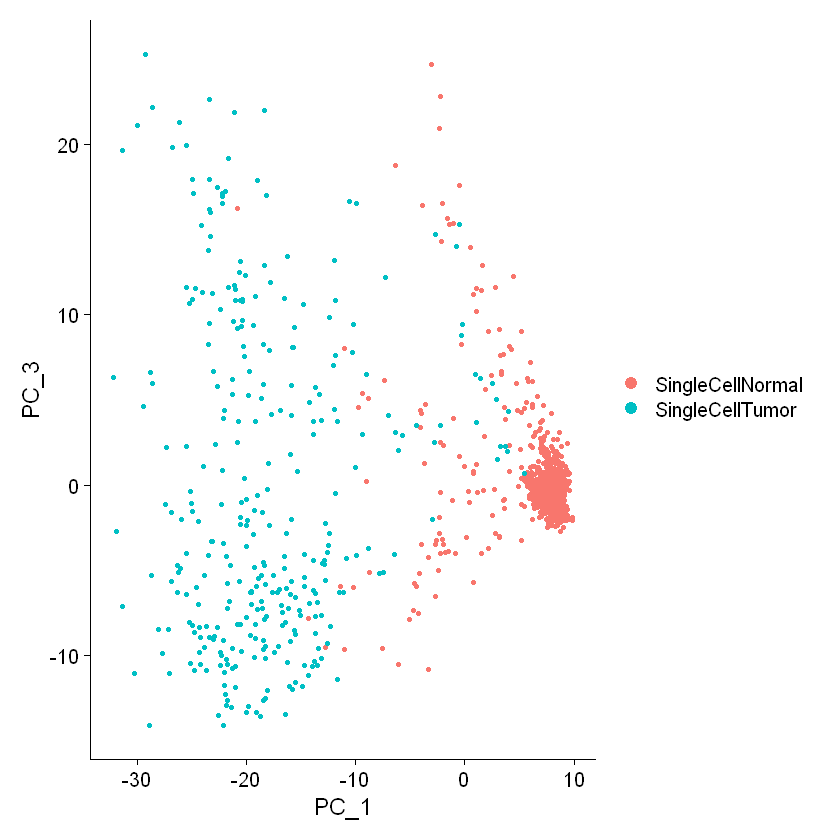

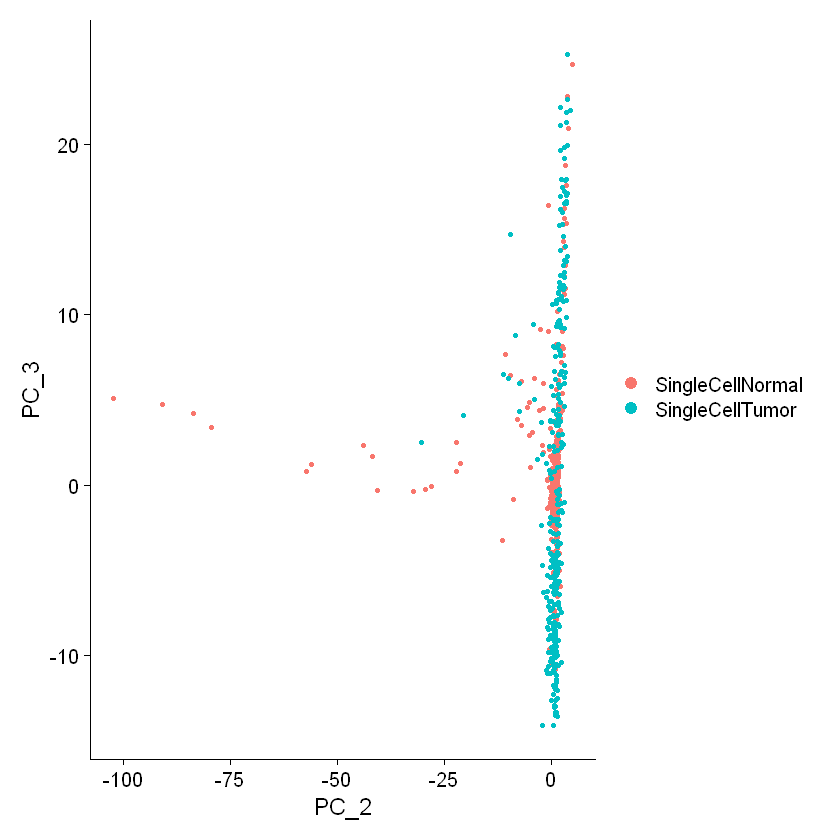

In [54]:
DimPlot(data.comb, reduction = "pca")
DimPlot(object = data.comb, dims = c(1, 3), reduction = "pca")
DimPlot(object = data.comb, dims = c(2, 3), reduction = "pca")

PC1 and PC2 cluster the cells according to Normal/ Tumor

#### Heatmaps

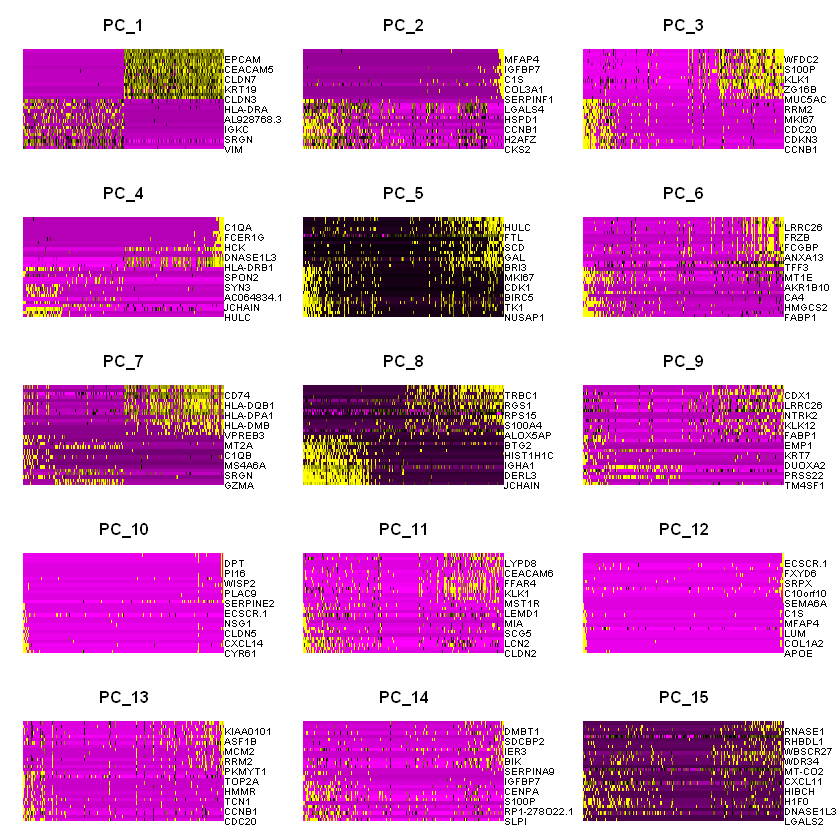

In [55]:
DimHeatmap(data.comb, dims = 1:15, cells = 500, balanced = TRUE)

### Choosing significant PCs

1) JackStraw Procedure

Warning message:
"Removed 21000 rows containing missing values (geom_point)."


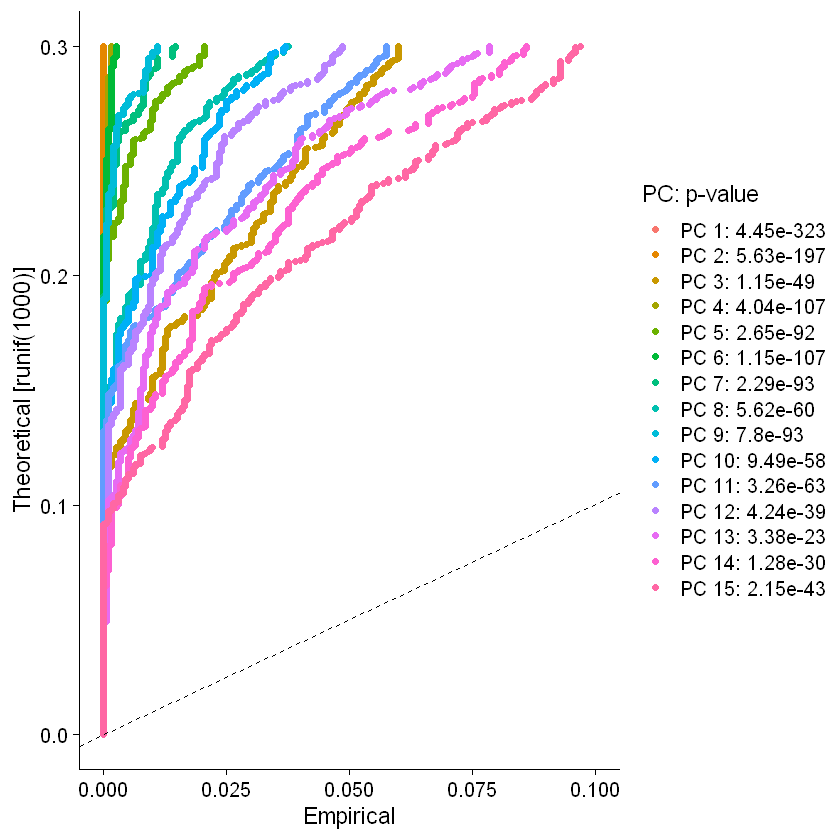

In [243]:
##Determine the ‘dimensionality’ of the dataset
##1) JackStraw procedure: randomly permute a subset of the data (1% by default) and rerun PCA, constructing a 
##‘null distribution’ of feature scores, and repeat this procedure. We identify ‘significant’ PCs as those who 
##have a strong enrichment of low p-value features.
##NOTE: This process can take a long time for big datasets, comment out for expediency. More
##approximate techniques such as those implemented in ElbowPlot() can be used to reduce computation time

data.comb <- JackStraw(data.comb, num.replicate = 100)
data.comb <- ScoreJackStraw(data.comb, dims = 1:20)
JackStrawPlot(data.comb, dims = 1:15)

2) Elbow Plot


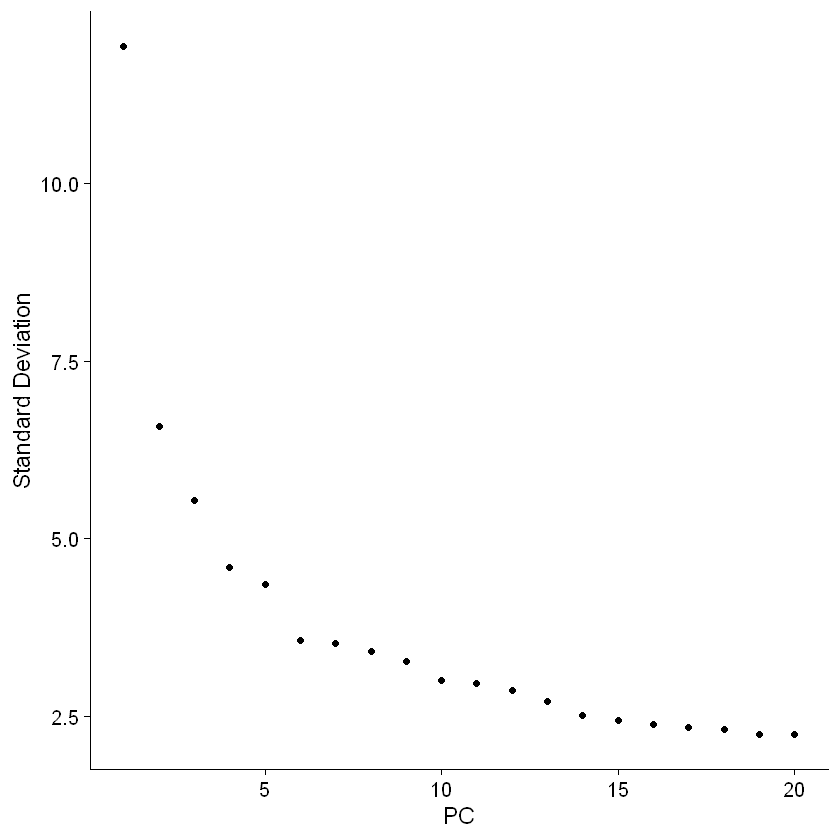

In [56]:
## Elbow plot: ranking of principle components based on the percentage of variance explained by each one(ElbowPlot()function)
ElbowPlot(data.comb)

We can observe an ‘elbow’ around PC14-15, suggesting that the majority of true signal is captured in the first 15 PCs

# Clustering 

In [57]:
data.comb <- FindNeighbors(data.comb, dims = 1:15)
data.comb <- FindClusters(data.comb, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1216
Number of edges: 43992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8835
Number of communities: 7
Elapsed time: 0 seconds


In [58]:
head(Idents(data.comb))

N_AAACCGTGATCGAC-1 N_AAACGCACCAGAAA-1 N_AAACGGCTAAAGTG-1 N_AAACGGCTGTATGC-1 
                 0                  0                  0                  0 
N_AAAGACGAGACACT-1 N_AAAGCAGAACTAGC-1 
                 0                  1 
Levels: 0 1 2 3 4 5 6

# Run non-linear dimensional reduction (UMAP/tSNE)

Similar cells are placed together in low-dimensional space

Cells within the graph-based clusters determined above should co-localize on these dimension reduction plots

In [61]:
reticulate::py_install(packages ='umap-learn')

In [62]:
data.comb <- RunUMAP(data.comb, dims = 1:15)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
00:49:49 UMAP embedding parameters a = 0.9922 b = 1.112

00:49:49 Read 1216 rows and found 15 numeric columns

00:49:49 Using Annoy for neighbor search, n_neighbors = 30

00:49:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:49:49 Writing NN index file to temp file C:\Users\marwa\AppData\Local\Temp\RtmpWO2qHn\file4d2821ab743d

00:49:49 Searching Annoy index using 1 thread, search_k = 3000

00:49:49 Annoy recall = 100%

00:49:49 Commencing smooth kNN distance calibration using 1 thre

### UMAP plot

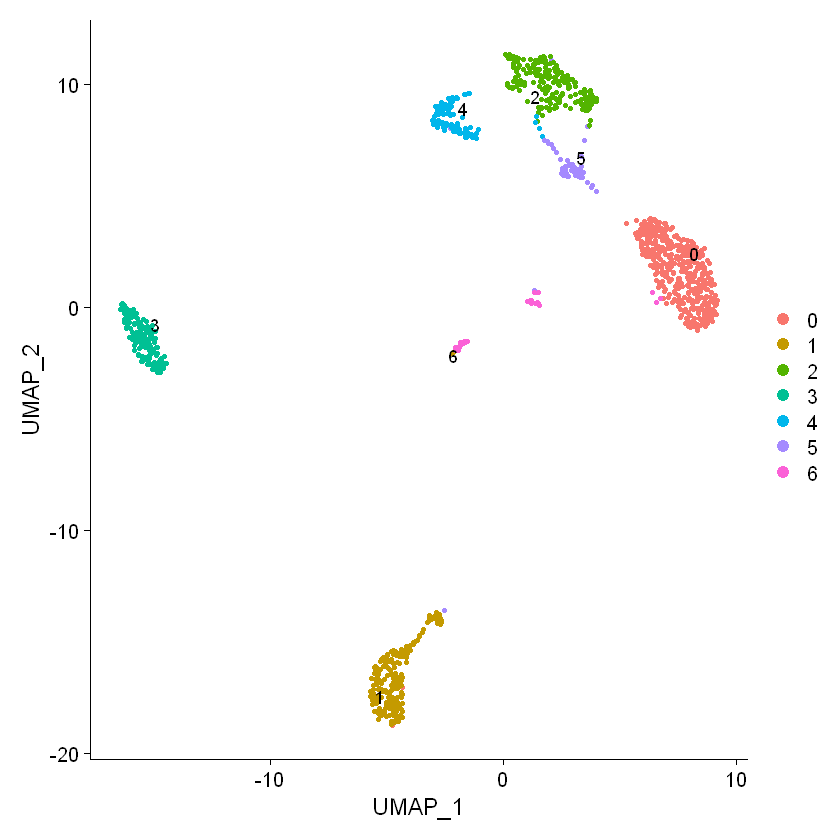

In [63]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label individual clusters
umapPlot = DimPlot(data.comb, reduction = "umap")
LabelClusters(plot = umapPlot, id = 'ident')

In [64]:
#plot another UMAP plot with Normal/Tumor as identitiy labels and compare both

data.comb$CellClusters <- Idents(data.comb)
data.comb@meta.data


,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,CellClusters
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
N_AAACCGTGATCGAC-1,SingleCellNormal,593,362,2.1922428,23.946037,0,0.00000000,0.9227040,0,0,0
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.0000000,43.190661,0,0.00000000,0.8838923,0,0,0
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.9777503,33.992583,0,0.00000000,0.8925523,0,0,0
N_AAACGGCTGTATGC-1,SingleCellNormal,671,396,4.9180328,21.162444,0,0.00000000,0.9189778,0,0,0
N_AAAGACGAGACACT-1,SingleCellNormal,1318,630,1.3657056,25.341426,0,0.00000000,0.8972489,0,0,0
N_AAAGCAGAACTAGC-1,SingleCellNormal,1524,598,1.2467192,29.002625,0,0.00000000,0.8723576,1,1,1
N_AAAGCAGACTGTTT-1,SingleCellNormal,684,343,2.1929825,28.216374,0,0.00000000,0.8942659,1,1,1
N_AAAGGCCTCTACGA-1,SingleCellNormal,1172,590,2.3037543,17.491468,0,0.08532423,0.9028730,0,0,0
N_AAAGTTTGGTAGCT-1,SingleCellNormal,4167,658,0.5039597,7.535397,0,0.00000000,0.7785534,3,3,3


In [65]:
Idents(data.comb) <- "orig.ident"
data.comb@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,CellClusters
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
N_AAACCGTGATCGAC-1,SingleCellNormal,593,362,2.1922428,23.946037,0,0.00000000,0.9227040,0,0,0
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.0000000,43.190661,0,0.00000000,0.8838923,0,0,0
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.9777503,33.992583,0,0.00000000,0.8925523,0,0,0
N_AAACGGCTGTATGC-1,SingleCellNormal,671,396,4.9180328,21.162444,0,0.00000000,0.9189778,0,0,0
N_AAAGACGAGACACT-1,SingleCellNormal,1318,630,1.3657056,25.341426,0,0.00000000,0.8972489,0,0,0
N_AAAGCAGAACTAGC-1,SingleCellNormal,1524,598,1.2467192,29.002625,0,0.00000000,0.8723576,1,1,1
N_AAAGCAGACTGTTT-1,SingleCellNormal,684,343,2.1929825,28.216374,0,0.00000000,0.8942659,1,1,1
N_AAAGGCCTCTACGA-1,SingleCellNormal,1172,590,2.3037543,17.491468,0,0.08532423,0.9028730,0,0,0
N_AAAGTTTGGTAGCT-1,SingleCellNormal,4167,658,0.5039597,7.535397,0,0.00000000,0.7785534,3,3,3


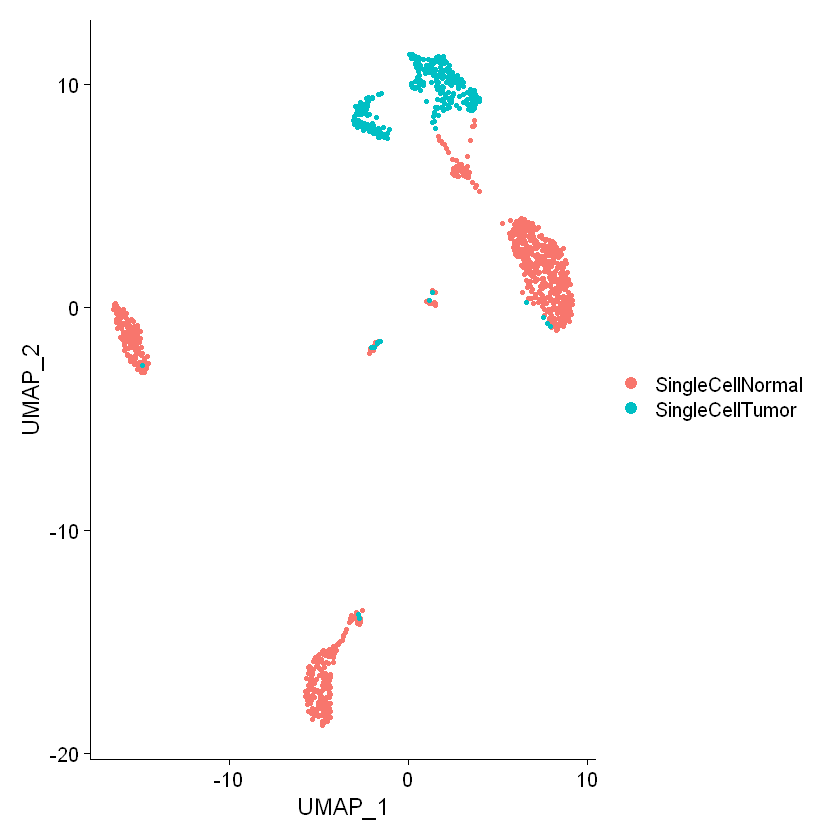

In [66]:
DimPlot(data.comb, reduction = "umap")

In [68]:
saveRDS(data.comb, "C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results/UMAP2.rds")


### tSNE Plot

In [261]:
s_obj = RunTSNE(s_obj)
DimPlot (s_obj, reduction = "tsne", label = TRUE)

ERROR: Error: Cannot find 'tsne' in this Seurat object


# Labeling Clusters according to DEGs

# Finding DEGs


## 1. DEGs between cell clusters

## 2. DEGs between Normal and Tumor cells of each type/ cluster

In [74]:
# add column to metadata combining cluster and Normal/Tumor for each cell
data.comb$TissueType <- Idents(data.comb)
head(data.comb@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,CellClusters,TissueType
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
N_AAACCGTGATCGAC-1,SingleCellNormal,593,362,2.192243,23.94604,0,0,0.9227040,0,0,0,CellClusters_Tissue
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.000000,43.19066,0,0,0.8838923,0,0,0,CellClusters_Tissue
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.977750,33.99258,0,0,0.8925523,0,0,0,CellClusters_Tissue
N_AAACGGCTGTATGC-1,SingleCellNormal,671,396,4.918033,21.16244,0,0,0.9189778,0,0,0,CellClusters_Tissue
N_AAAGACGAGACACT-1,SingleCellNormal,1318,630,1.365706,25.34143,0,0,0.8972489,0,0,0,CellClusters_Tissue
N_AAAGCAGAACTAGC-1,SingleCellNormal,1524,598,1.246719,29.00262,0,0,0.8723576,1,1,1,CellClusters_Tissue


In [307]:
data.comb@meta.data$CellClusters_Tissue = paste(data.comb@meta.data$CellClusters, data.comb@meta.data$TissueType, sep = "_")
head(data.comb@meta.data)
tail(data.comb@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,percent.hb,percent.plat,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,CellClusters,TissueType,CellClusters_Tissue
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
N_AAACATTGGCTCCT-1,SingleCellNormal,735,383,23.513514,5.675676,0,0,23.513514,5.675676,0,0,0.9012351,7,7,7,SingleCellNormal,7_SingleCellNormal
N_AAACCGTGATCGAC-1,SingleCellNormal,588,357,2.192243,23.946037,0,0,2.192243,23.946037,0,0,0.9217481,1,1,1,SingleCellNormal,1_SingleCellNormal
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.000000,43.190661,0,0,0.000000,43.190661,0,0,0.8838923,1,1,1,SingleCellNormal,1_SingleCellNormal
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.977750,33.992583,0,0,1.977750,33.992583,0,0,0.8925523,1,1,1,SingleCellNormal,1_SingleCellNormal
N_AAACGGCTGTATGC-1,SingleCellNormal,664,389,4.918033,21.162444,0,0,4.918033,21.162444,0,0,0.9177163,4,4,4,SingleCellNormal,4_SingleCellNormal
N_AAAGACGAGACACT-1,SingleCellNormal,1315,627,1.365706,25.341426,0,0,1.365706,25.341426,0,0,0.8968689,1,1,1,SingleCellNormal,1_SingleCellNormal


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,percent.hb,percent.plat,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,CellClusters,TissueType,CellClusters_Tissue
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
T_TTTCACGAAGCCAT-1,SingleCellTumor,2991,1160,11.0777444,29.56290,0,0.03336670,11.0777444,29.56290,0,0.03336670,0.8816513,0,0,0,SingleCellTumor,0_SingleCellTumor
T_TTTCAGTGAGTCAC-1,SingleCellTumor,6565,1858,11.8765207,26.36861,0,0.00000000,11.8765207,26.36861,0,0.00000000,0.8563911,2,2,2,SingleCellTumor,2_SingleCellTumor
T_TTTCCAGAAAACAG-1,SingleCellTumor,9022,1954,0.1883239,35.59322,0,0.03323363,0.1883239,35.59322,0,0.03323363,0.8320285,6,6,6,SingleCellTumor,6_SingleCellTumor
T_TTTCTACTAACGGG-1,SingleCellTumor,5812,1662,10.6258597,26.82256,0,0.00000000,10.6258597,26.82256,0,0.00000000,0.8555665,2,2,2,SingleCellTumor,2_SingleCellTumor
T_TTTGCATGAAGTGA-1,SingleCellTumor,2971,1040,11.0699865,28.97039,0,0.00000000,11.0699865,28.97039,0,0.00000000,0.8687354,2,2,2,SingleCellTumor,2_SingleCellTumor
T_TTTGCATGCTGTCC-1,SingleCellTumor,9297,2473,3.6635153,25.58015,0,0.04297379,3.6635153,25.58015,0,0.04297379,0.8550733,0,0,0,SingleCellTumor,0_SingleCellTumor


In [77]:
# Find DEGs between Normal and Tumor cells of each cluster
Idents(data.comb)='CellClusters_Tissue'
#at least 20% of the cells express the gene
markers_3 = FindMarkers(data.comb, ident.1 = '5_SingleCellTumor', ident.2 = '5_SingleCellNormal', logfc.threshold = 0, min.pct = 0)
write.csv(markers_1_2, 'C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results/markers_5.2.csv')

ERROR: Error in WhichCells.Seurat(object = object, idents = ident.1): Cannot find the following identities in the object: 5_SingleCellTumor


In [311]:
install.packages('BiocManager')
BiocManager::install('limma')

package 'BiocManager' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marwa\AppData\Local\Temp\Rtmpeggg6m\downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.16), R 4.0.5 (2021-03-31)

Installing package(s) 'BiocVersion', 'limma'



package 'BiocVersion' successfully unpacked and MD5 sums checked
package 'limma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marwa\AppData\Local\Temp\Rtmpeggg6m\downloaded_packages


Old packages: 'bslib', 'deldir', 'diffobj', 'goftest', 'later', 'mgcv',
  'stringi', 'testthat'



In [5]:
data.comb@meta.data

ERROR: Error in eval(expr, envir, enclos): object 'data.comb' not found
